In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering
from sklearn.metrics import accuracy_score, adjusted_rand_score, silhouette_score, davies_bouldin_score, adjusted_mutual_info_score
from sklearn.decomposition import PCA
import pylab as pl

In [2]:
green_data = pd.read_csv('../green_consensus.csv')
hinselmann_data = pd.read_csv('../hinselmann_consensus.csv')
schiller_data = pd.read_csv('../schiller_consensus.csv')

hinselmann_data['hinselmann'] = 1
hinselmann_data['schiller'] = 0
schiller_data['hinselmann'] = 0
schiller_data['schiller'] = 1

data = pd.concat([hinselmann_data, schiller_data])
data_frac = data.sample(frac=0.1, random_state=42)
data = data.drop(index=data_frac.index)
data_frac = data_frac.reset_index(drop=True)
data = data.reset_index(drop=True)

In [14]:
data

,cervix_area,os_area,walls_area,speculum_area,artifacts_area,cervix_artifacts_area,os_artifacts_area,walls_artifacts_area,speculum_artifacts_area,cervix_specularities_area,...,dist_to_center_cervix,dist_to_center_os,experts::0,experts::1,experts::2,experts::3,experts::4,consensus,hinselmann,schiller
0,0.334652,0.002727,0.054515,0.265214,0.165955,0.006267,0.000000,0.034324,0.009077,0.001381,...,0.256455,0.404257,1.0,1.0,1.0,1.0,1.0,1.0,1,0
1,0.441332,0.002393,0.157184,0.204246,0.052486,0.000000,0.000000,0.315968,0.003177,0.010093,...,0.566759,0.491791,1.0,1.0,1.0,0.0,1.0,1.0,1,0
2,0.486323,0.017873,0.211711,0.245662,0.039998,0.000000,0.000000,0.003168,0.001563,0.003664,...,0.466575,0.491928,1.0,1.0,1.0,1.0,1.0,1.0,1,0
3,0.383839,0.006636,0.158500,0.377851,0.046453,0.000000,0.000000,0.010741,0.013657,0.001535,...,0.371283,0.632375,1.0,1.0,1.0,1.0,1.0,1.0,1,0
4,0.613026,0.007757,0.091303,0.235390,0.000000,0.000000,0.000000,0.000000,0.000000,0.001109,...,0.593152,0.364539,1.0,1.0,1.0,1.0,1.0,1.0,1,0
5,0.576114,0.004209,0.184991,0.125968,0.073501,0.024559,0.027595,0.041227,0.000000,0.008422,...,0.277214,0.316149,1.0,0.0,1.0,1.0,1.0,1.0,1,0
6,0.563717,0.004940,0.218896,0.227686,0.000000,0.000000,0.000000,0.000000,0.000000,0.005811,...,0.467773,0.416021,1.0,0.0,1.0,1.0,1.0,1.0,1,0
7,0.533574,0.007373,0.137091,0.216730,0.000000,0.000000,0.000000,0.000000,0.000000,0.007745,...,0.443464,0.493732,1.0,1.0,1.0,0.0,1.0,1.0,1,0
8,0.522382,0.017228,0.152831,0.252048,0.000000,0.000000,0.000000,0.000000,0.000000,0.001447,...,0.192194,0.301538,1.0,1.0,1.0,1.0,1.0,1.0,1,0
9,0.306175,0.001556,0.122676,0.316626,0.000000,0.000000,0.000000,0.000000,0.000000,0.001080,...,0.261678,0.233486,1.0,0.0,1.0,0.0,0.0,0.0,1,0


In [3]:
data.columns

Index(['cervix_area', 'os_area', 'walls_area', 'speculum_area',
       'artifacts_area', 'cervix_artifacts_area', 'os_artifacts_area',
       'walls_artifacts_area', 'speculum_artifacts_area',
       'cervix_specularities_area', 'os_specularities_area',
       'walls_specularities_area', 'speculum_specularities_area',
       'specularities_area', 'area_h_max_diff', 'rgb_cervix_r_mean',
       'rgb_cervix_r_std', 'rgb_cervix_r_mean_minus_std',
       'rgb_cervix_r_mean_plus_std', 'rgb_cervix_g_mean', 'rgb_cervix_g_std',
       'rgb_cervix_g_mean_minus_std', 'rgb_cervix_g_mean_plus_std',
       'rgb_cervix_b_mean', 'rgb_cervix_b_std', 'rgb_cervix_b_mean_minus_std',
       'rgb_cervix_b_mean_plus_std', 'rgb_total_r_mean', 'rgb_total_r_std',
       'rgb_total_r_mean_minus_std', 'rgb_total_r_mean_plus_std',
       'rgb_total_g_mean', 'rgb_total_g_std', 'rgb_total_g_mean_minus_std',
       'rgb_total_g_mean_plus_std', 'rgb_total_b_mean', 'rgb_total_b_std',
       'rgb_total_b_mean_minus_std'

In [4]:
classes = ['experts::{}'.format(i) for i in range(5)]
classes.extend(['consensus', 'hinselmann', 'schiller'])
X = data.drop(columns=classes)
X_test = data_frac.drop(columns=classes)
Q1 = X.quantile(0.05)
Q3 = X.quantile(0.95)
IQR = Q3 - Q1
color_cols = [col for col in X.columns if ('cervix' in col and '_v_' in col) and (('hsv' in col))]
print(color_cols)
X = X[color_cols]
X_test = X_test[color_cols]

#X = X[~((X < (Q1 - 1.5 * IQR)) |(X > (Q3 + 1.5 * IQR))).any(axis=1)]


y = data.iloc[X.index]['consensus']
y_dataset = data.iloc[X.index][['schiller', 'hinselmann']].idxmax(axis=1)
y_test = data_frac[['schiller', 'hinselmann']].idxmax(axis=1)
y_dataset = y_dataset.map({'hinselmann': 0, 'schiller': 1})
y_test = y_test.map({'hinselmann': 0, 'schiller': 1})
y_dataset = y_dataset.reset_index(drop=True)
pca = PCA(0.95).fit(X)
X = pca.transform(X)
X_test = pca.transform(X_test)

['hsv_cervix_v_mean', 'hsv_cervix_v_std']


In [5]:
y_dataset.shape[0]

155

In [6]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
X_test = scaler.transform(X_test)

In [7]:
def kMeans(X, n_clusters=2):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)
    
    predicted = kmeans.predict(X)
    centers = kmeans.cluster_centers_
    labels = kmeans.labels_
    return labels, kmeans

def hierarchical(X, n_clusters=2):
    ac = SpectralClustering(n_clusters=n_clusters)
    ac.fit(X)

    labels = ac.labels_
    return labels


In [8]:
kpred, kmeans = kMeans(X, 2)

In [9]:
print(adjusted_mutual_info_score(y_dataset, kpred))
print(adjusted_rand_score(y_dataset, kpred))


0.5330409610297273
0.586876054857651


/home/francisconeves/anaconda3/lib/python3.6/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


In [10]:
kpred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1], dtype=int32)

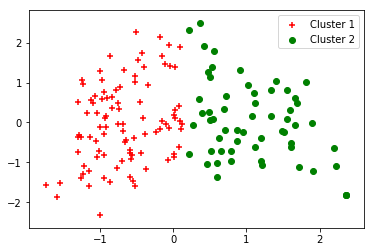

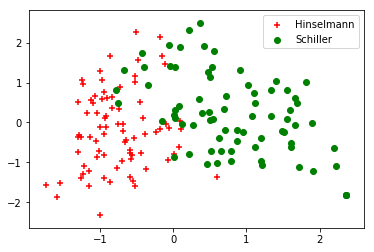

In [11]:
for i in range(0, X.shape[0]):
    if kpred[i] == 0:
        c1 = pl.scatter(X[i,0], X[i,1], c='r', marker="+")
    elif kpred[i] == 1:
        c2 = pl.scatter(X[i,0], X[i,1], c='g', marker="o")
    elif kpred[i] == 2:
        c3 = pl.scatter(X[i,0], X[i,1], c='b', marker="*")
        
#pl.legend([c1, c2, c3], ['Cluster 1', 'Cluster 2', 'Cluster 3'])
pl.legend([c1, c2], ['Cluster 1', 'Cluster 2'])
pl.show()

for i in range(0, X.shape[0]):
    if y_dataset[i] == 0:
        c1 = pl.scatter(X[i,0], X[i,1], c='r', marker="+")
    elif y_dataset[i] == 1:
        c2 = pl.scatter(X[i,0], X[i,1], c='g', marker="o")
    elif y_dataset[i] == 2:
        c3 = pl.scatter(X[i,0], X[i,1], c='b', marker="*")
        
#pl.legend([c1, c2, c3], ['Green', 'Hinselmann', 'Schiller'])
pl.legend([c1, c2], ['Hinselmann', 'Schiller'])
pl.show()

In [12]:
pred = kmeans.predict(X_test)

In [13]:
adjusted_rand_score(y_test, pred)

0.601998904709748